In [6]:
using PyPlot
using JuMP, Ipopt

In [7]:
include("../src/model.jl");
include("../src/diagnostics.jl");
include("../src/optimization.jl");
include("../src/plotting.jl");
include("../src/defaults.jl");

## Initialize model

In [8]:
dt = 1.
t = Array(2020:dt:2100);
model = ClimateModel(
    "soldatenko",
    t,
    dt,
    present_year,
    Economics0(t),
    Physics(),
    init_zero_controls(t)
);

In [9]:
optimize_controls!(
    model,
    obj_option = "temp",
    temp_goal = δT_init+1.0,
    temp_final = δT_init,
    max_deployment=Dict("remove"=>0., "mitigate"=>0., "geoeng"=>1., "adapt"=>0.),
    start_deployment=Dict("remove"=>2020., "mitigate"=>2020., "geoeng"=>2020., "adapt"=>2020.),
);

Solve_Succeeded


### Plotting the optimal solution state

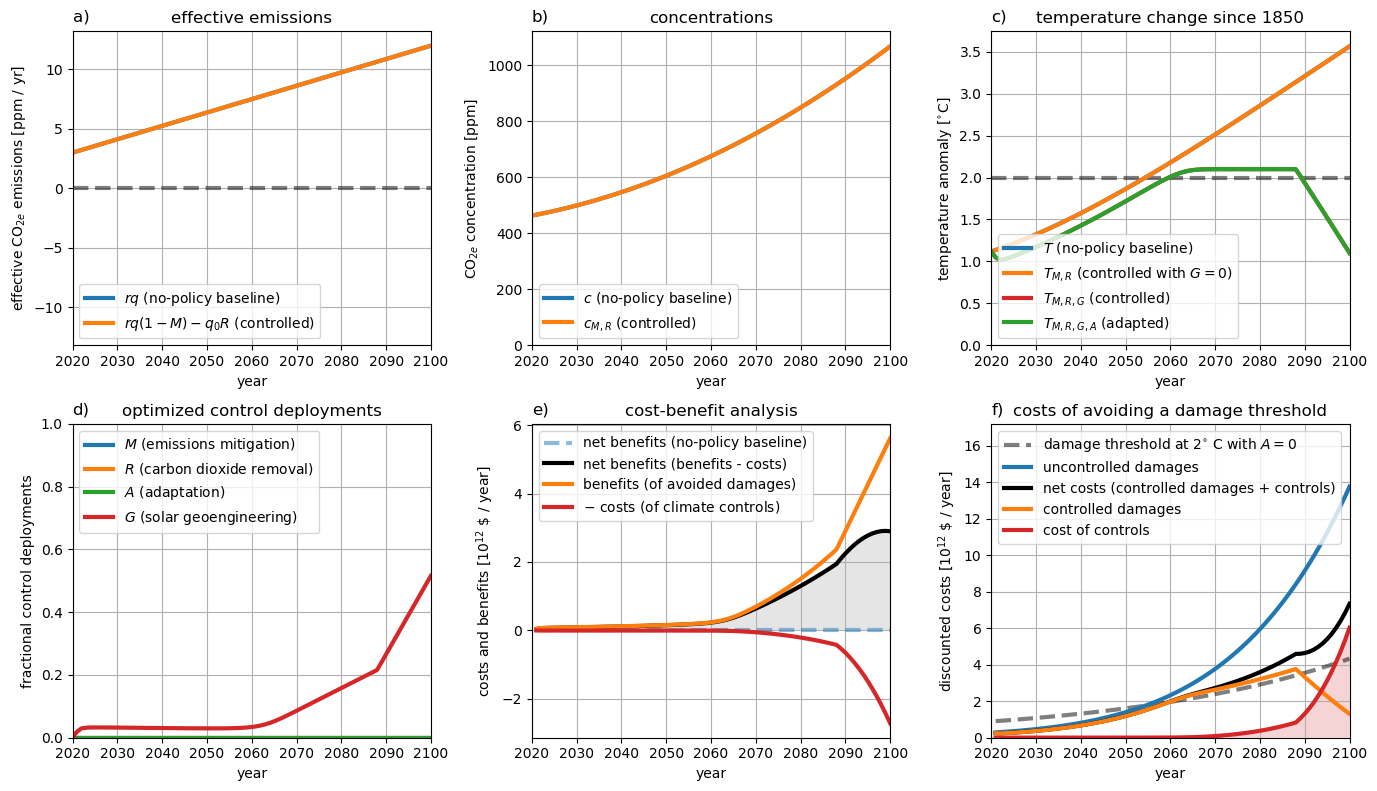

In [10]:
plot_state(model)
savefig("../figures/replicate_Soldatenko.pdf", bbox_inches="tight", dpi=150)